# Objective

Determine the good measurement for flow cell "dirtiness" (i.e., how badly the background is contaminated by those small bright specks that build up).

# Contents

This notebook shows each image and six different possible metrics for the dirtiness of that image. The six metrics shown here are the following:
- `image_name`: summing the image without filtering
- `sum_filtered1`: summing the image with a bandpass filter to enhance the speckles
- `sum_filtered2`: summing the image with two bandpass filters to remove the "ghosts"
- `sum_filtered2`: summing the binarized image without filtering
- `sum_filtered2`: summing the binarized image with a bandpass filter to enhance the speckles
- `sum_bin_filtered2`: summing the binarized image with two bandpass filters to remove the "ghosts"

At the bottom of the notebook is a plot for each metric with the image name on the vertical axis ticks.

# Results

There’s definite a clearer pattern of dirtiness is definitely increasing from lane 1 to lane 7 as expected in the last two plots, which are the ones for (1) summing the hot areas of an image that was binarized after application of a bandpass filter and (2) summing the hot areas of an image that was binarized after application of the first bandpass filter and also another one to remove the "ghosts.” So those two metrics are possibilities for measuring the dirtiness of the flow cells.

In [1]:
from skimage.io import imread
from skimage.filters import difference_of_gaussians, threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)
    return img[starty:starty+cropy,startx:startx+cropx]

In [3]:
cropx, cropy = 1448, 1448
sig_min = 1
sig_max1 = 12
sig_max2 = 3
data_dir = '2022-03-25 GB20106 flow cell background sample images'

------------------
background-20220107-111707-1.tif


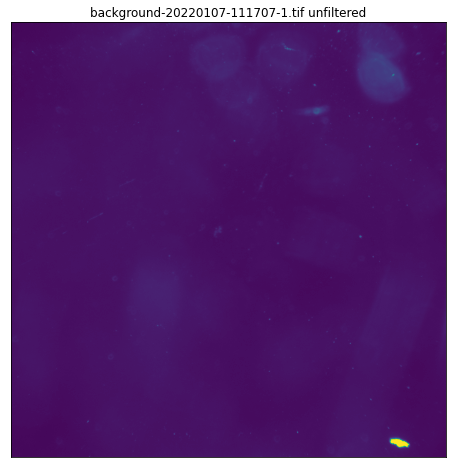

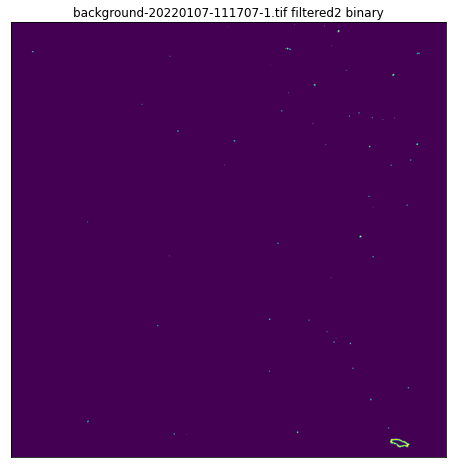

{'image_name': 'background-20220107-111707-1.tif', 'binarization_threshold': 0.03810745953645925, 'sum_bin_filtered2': 1196}
------------------
background-20220107-111707-7.tif


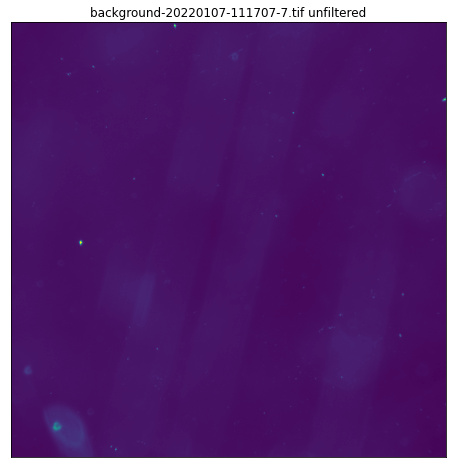

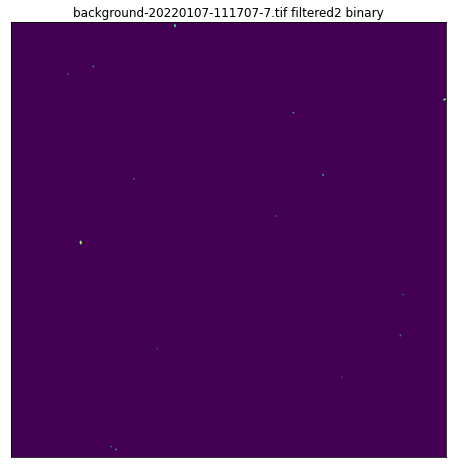

{'image_name': 'background-20220107-111707-7.tif', 'binarization_threshold': 0.08392967691597393, 'sum_bin_filtered2': 279}
------------------
background-20220112-105942-1.tif


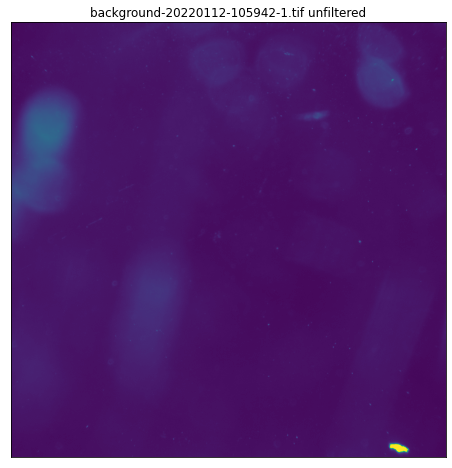

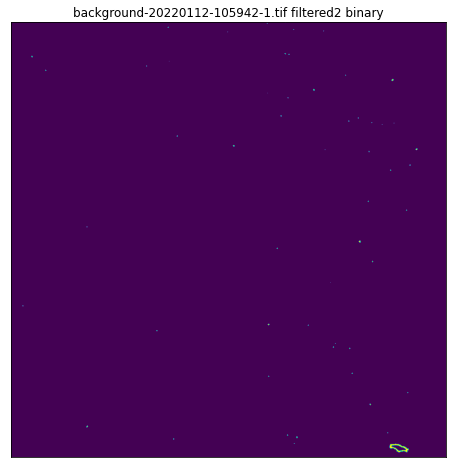

{'image_name': 'background-20220112-105942-1.tif', 'binarization_threshold': 0.037003952164152504, 'sum_bin_filtered2': 1107}
------------------
background-20220112-105942-7.tif


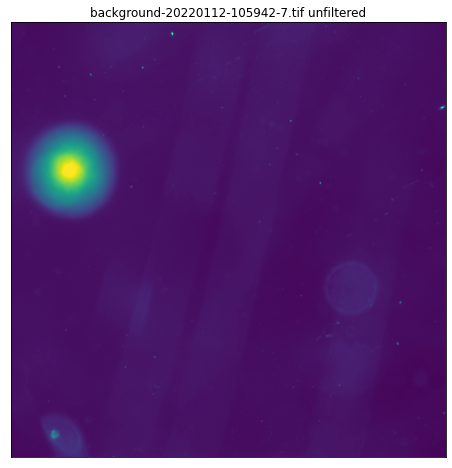

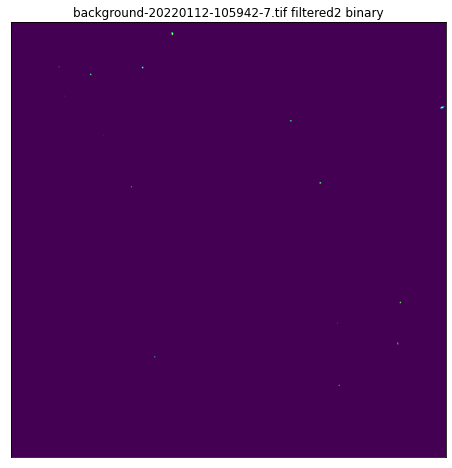

{'image_name': 'background-20220112-105942-7.tif', 'binarization_threshold': 0.07378440678315742, 'sum_bin_filtered2': 235}
------------------
background-20220112-132037-1.tif


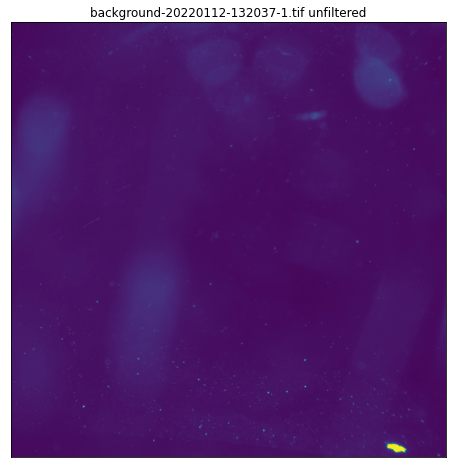

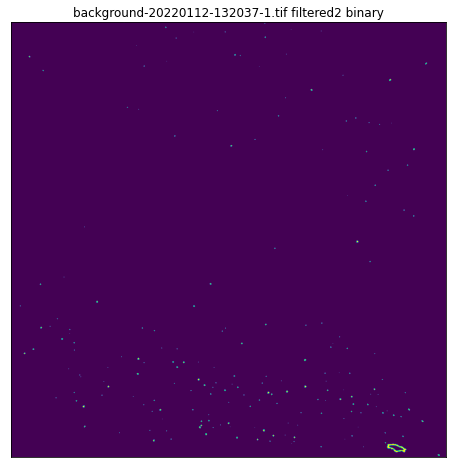

{'image_name': 'background-20220112-132037-1.tif', 'binarization_threshold': 0.03944164098390708, 'sum_bin_filtered2': 2448}
------------------
background-20220112-132037-7.tif


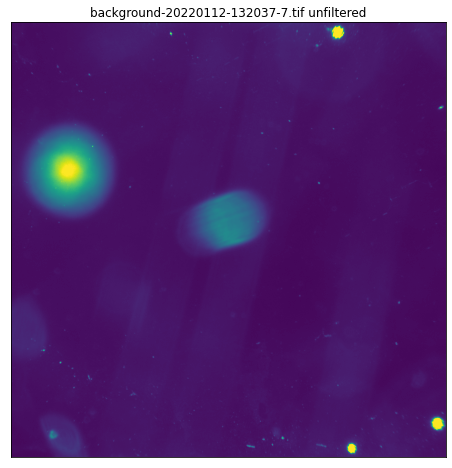

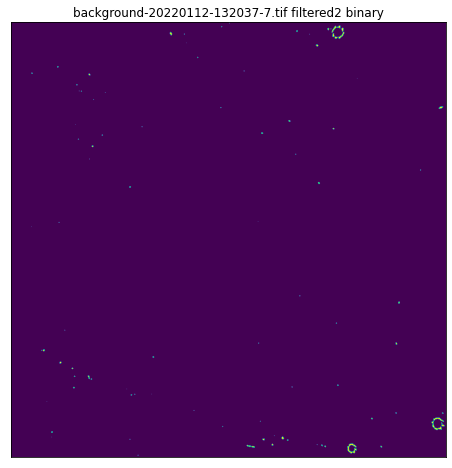

{'image_name': 'background-20220112-132037-7.tif', 'binarization_threshold': 0.04525099230559418, 'sum_bin_filtered2': 2409}
------------------
background-20220113-143848-1.tif


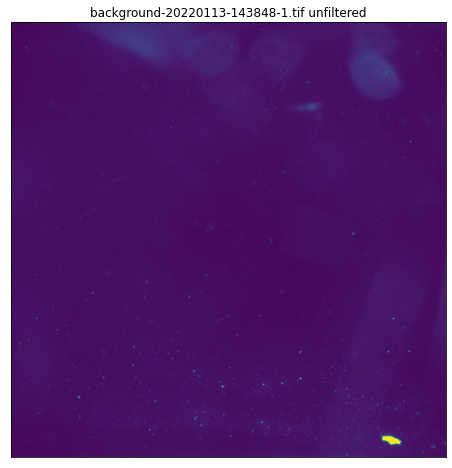

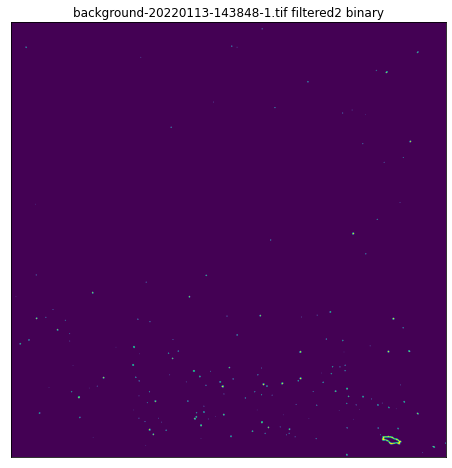

{'image_name': 'background-20220113-143848-1.tif', 'binarization_threshold': 0.046037232332208244, 'sum_bin_filtered2': 2173}
------------------
background-20220113-143848-7.tif


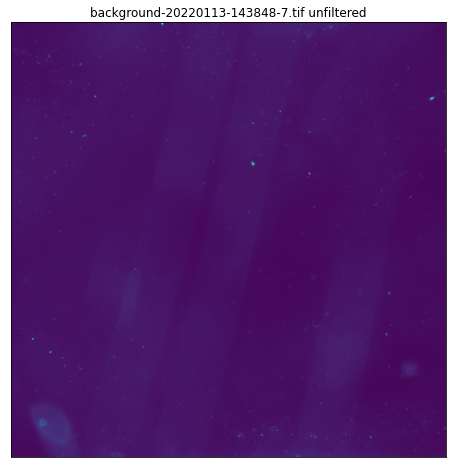

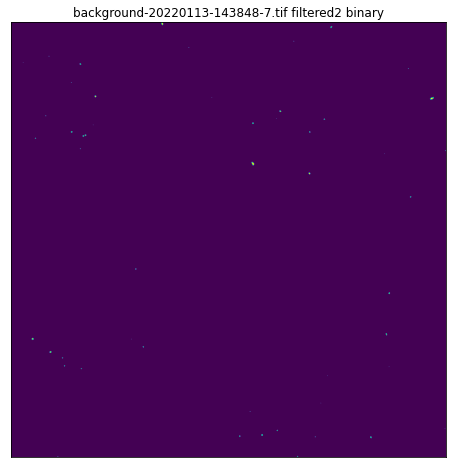

{'image_name': 'background-20220113-143848-7.tif', 'binarization_threshold': 0.06943705576840443, 'sum_bin_filtered2': 562}
------------------
background-20220203-200232-1.tif


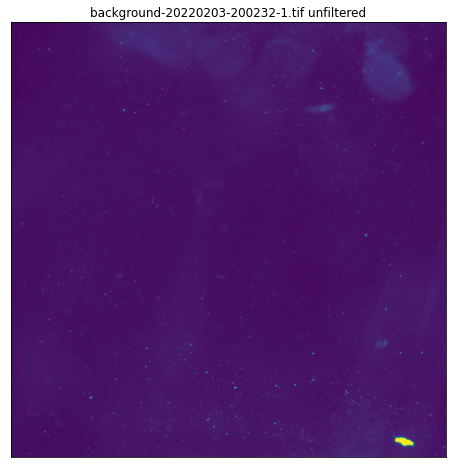

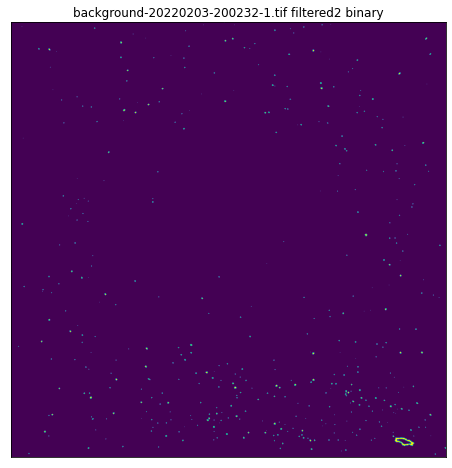

{'image_name': 'background-20220203-200232-1.tif', 'binarization_threshold': 0.034752201837485994, 'sum_bin_filtered2': 4615}
------------------
background-20220203-200232-7.tif


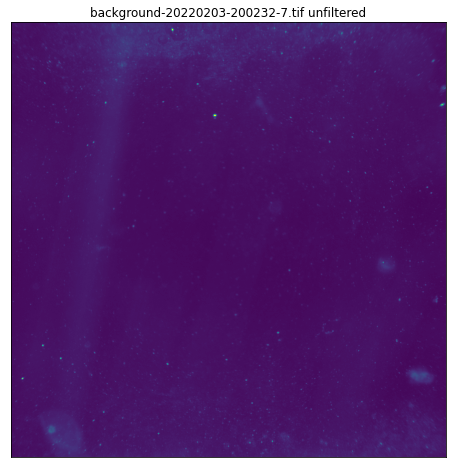

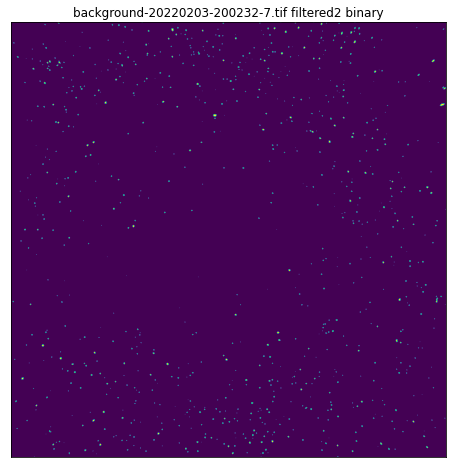

{'image_name': 'background-20220203-200232-7.tif', 'binarization_threshold': 0.022682835472995683, 'sum_bin_filtered2': 8842}
------------------
background-20220204-135055-1.tif


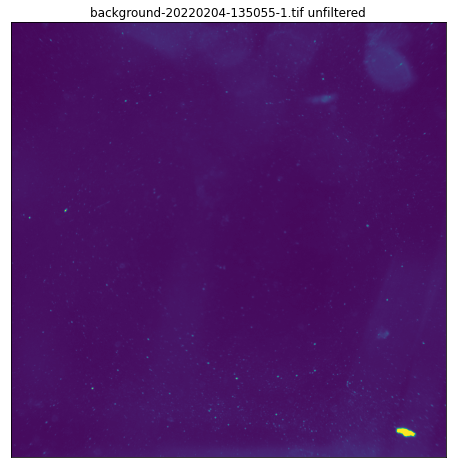

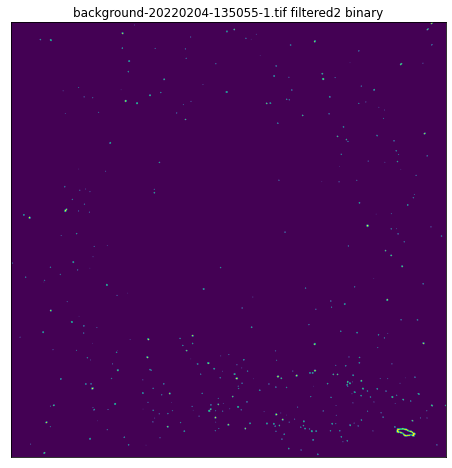

{'image_name': 'background-20220204-135055-1.tif', 'binarization_threshold': 0.0390344075402161, 'sum_bin_filtered2': 4154}
------------------
background-20220204-135055-7.tif


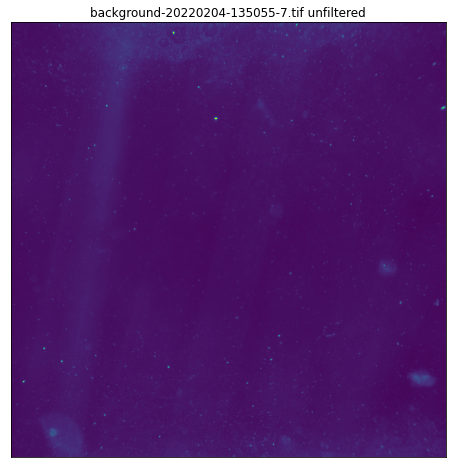

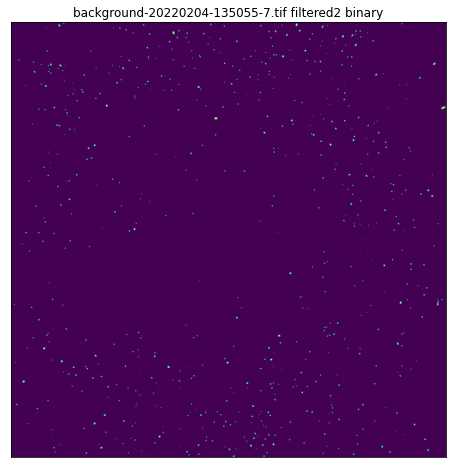

{'image_name': 'background-20220204-135055-7.tif', 'binarization_threshold': 0.026405103975109492, 'sum_bin_filtered2': 6767}
------------------
background-20220222-145113-1.tif


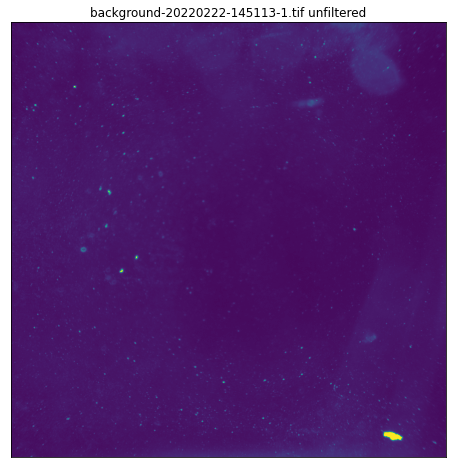

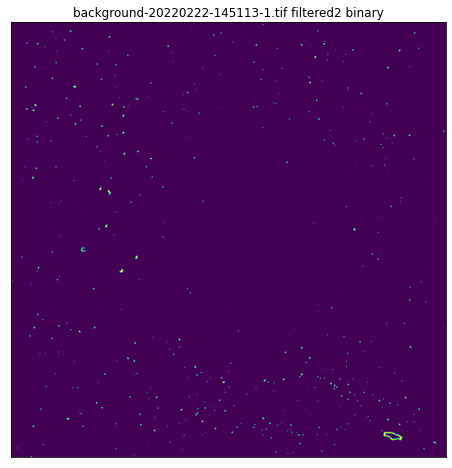

{'image_name': 'background-20220222-145113-1.tif', 'binarization_threshold': 0.043181251760775766, 'sum_bin_filtered2': 5447}
------------------
background-20220222-145113-7.tif


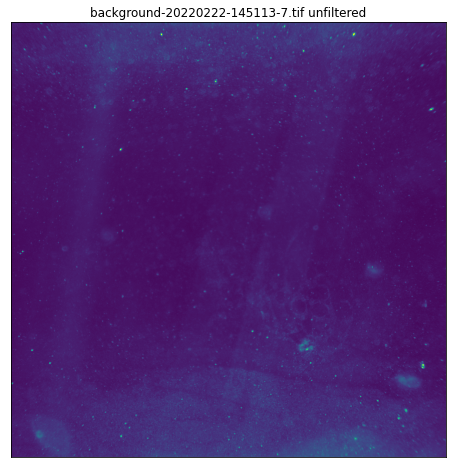

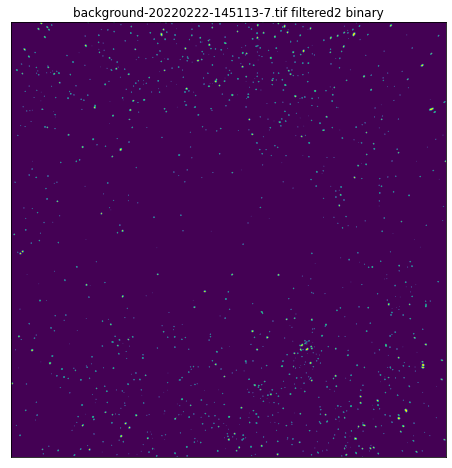

{'image_name': 'background-20220222-145113-7.tif', 'binarization_threshold': 0.030697714193669713, 'sum_bin_filtered2': 11883}
------------------
background-20220302-193248-1.tif


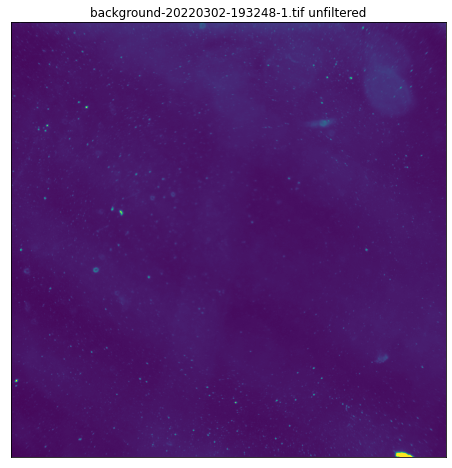

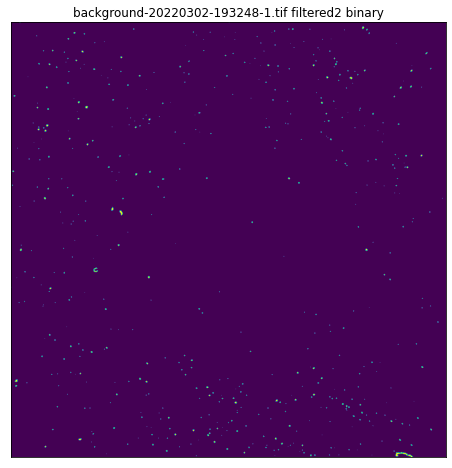

{'image_name': 'background-20220302-193248-1.tif', 'binarization_threshold': 0.040909207529413294, 'sum_bin_filtered2': 5543}
------------------
background-20220302-193248-7.tif


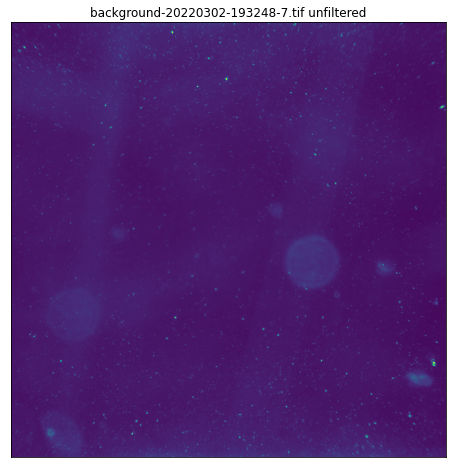

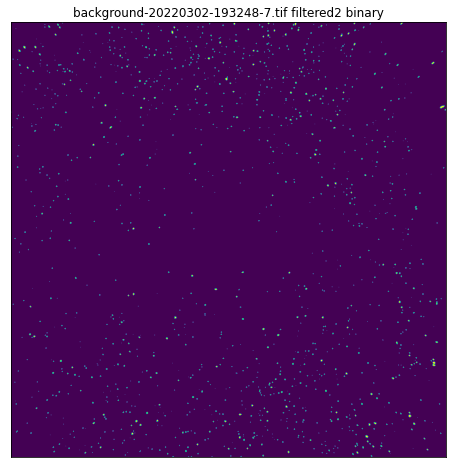

{'image_name': 'background-20220302-193248-7.tif', 'binarization_threshold': 0.03024961511379013, 'sum_bin_filtered2': 13273}
------------------
background-20220303-111846-1.tif


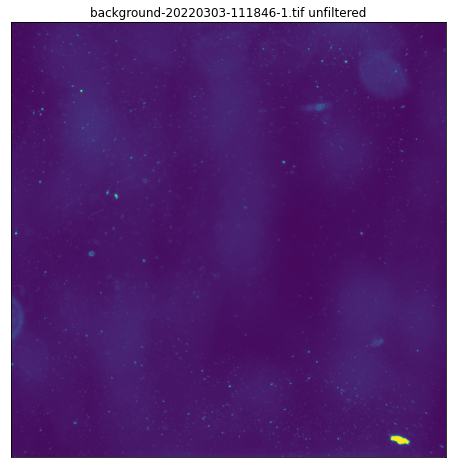

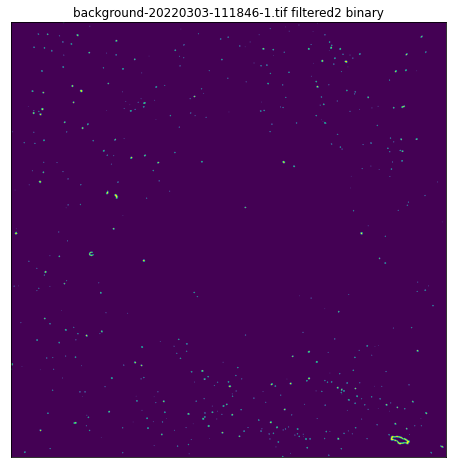

{'image_name': 'background-20220303-111846-1.tif', 'binarization_threshold': 0.04185320281805022, 'sum_bin_filtered2': 5467}
------------------
background-20220303-111846-7.tif


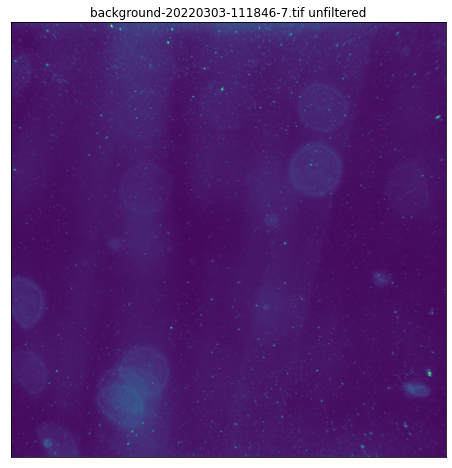

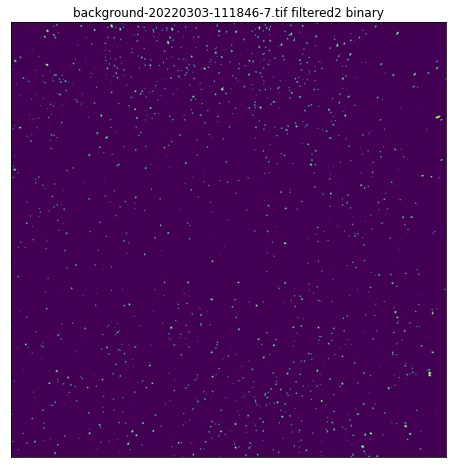

{'image_name': 'background-20220303-111846-7.tif', 'binarization_threshold': 0.03130254248211431, 'sum_bin_filtered2': 13308}
------------------
background-20220307-114458-1.tif


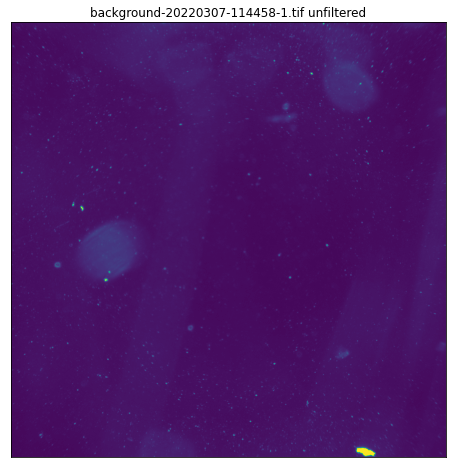

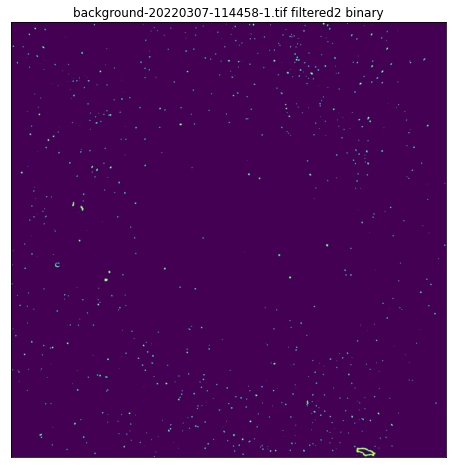

{'image_name': 'background-20220307-114458-1.tif', 'binarization_threshold': 0.032194023513155035, 'sum_bin_filtered2': 8142}
------------------
background-20220307-114458-7.tif


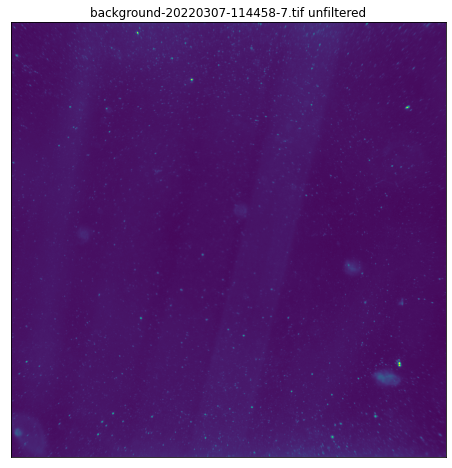

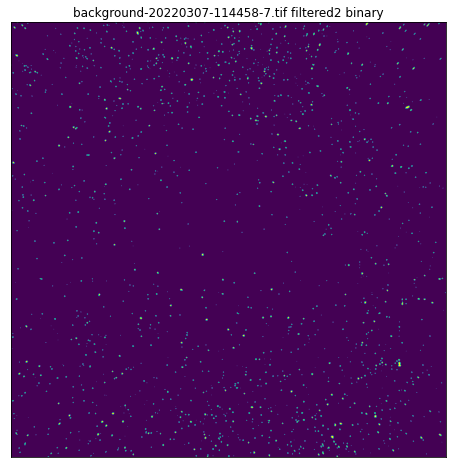

{'image_name': 'background-20220307-114458-7.tif', 'binarization_threshold': 0.02449680366628844, 'sum_bin_filtered2': 16694}
------------------
background-20220308-123803-1.tif


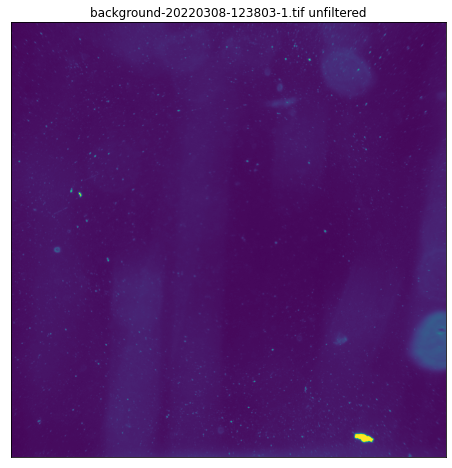

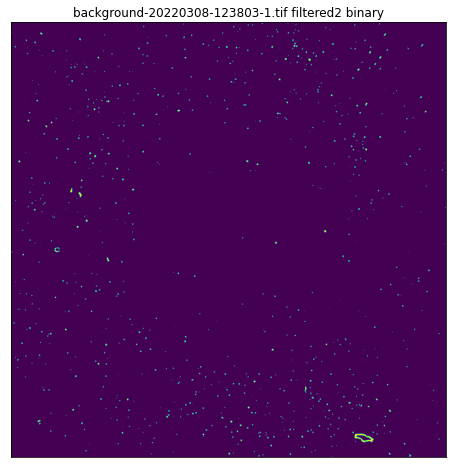

{'image_name': 'background-20220308-123803-1.tif', 'binarization_threshold': 0.0292169180526808, 'sum_bin_filtered2': 8981}
------------------
background-20220308-123803-7.tif


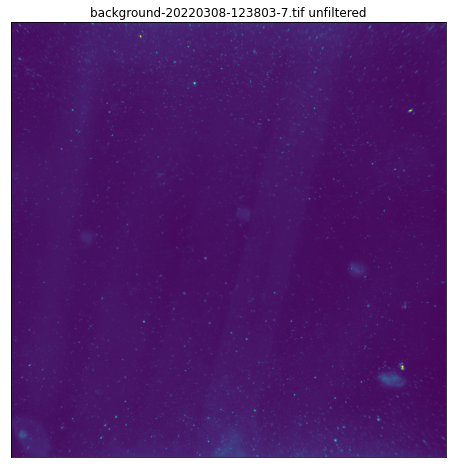

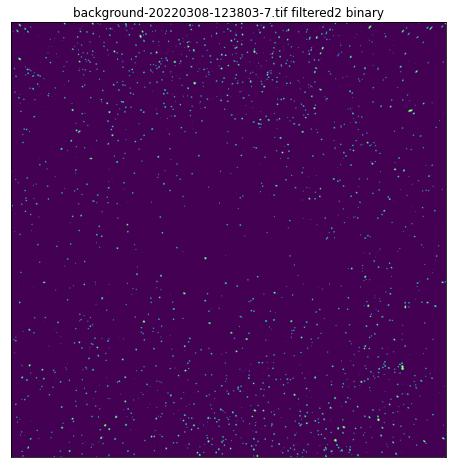

{'image_name': 'background-20220308-123803-7.tif', 'binarization_threshold': 0.02517799441982274, 'sum_bin_filtered2': 17837}


In [4]:
df = pd.DataFrame(columns=['image_name', 'binarization_threshold', 'sum_bin_filtered2'])
image_names = sorted(os.listdir(data_dir))
for image_name in image_names:
    
    print('------------------')
    print(image_name)
    
    path = '%s/%s' % (data_dir, image_name)
    image = imread(path)
    
    image_cropped = crop_center(image,cropx,cropy)
    filtered1_image = difference_of_gaussians(image_cropped, sig_min, sig_max1)
    filtered2_image = difference_of_gaussians(filtered1_image, sig_min, sig_max2)
    binarization_threshold = threshold_otsu(filtered2_image)
    filtered2_binary = filtered2_image > binarization_threshold
    
    plt.figure(figsize=(8,8))
    plt.imshow(image_cropped)
    plt.title('%s unfiltered' % image_name)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    plt.figure(figsize=(8,8))
    plt.imshow(filtered2_binary)
    plt.title('%s filtered2 binary' % image_name)
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
    sum_bin_filtered2 = np.sum(filtered2_binary)
    
    # store results in a pandas table    
    row = {'image_name': image_name,
           'binarization_threshold': binarization_threshold,
           'sum_bin_filtered2': sum_bin_filtered2}
    
    print(row)
    df = df.append(row, ignore_index=True)

In [5]:
df

image_name  binarization_threshold sum_bin_filtered2
0   background-20220107-111707-1.tif                0.038107              1196
1   background-20220107-111707-7.tif                0.083930               279
2   background-20220112-105942-1.tif                0.037004              1107
3   background-20220112-105942-7.tif                0.073784               235
4   background-20220112-132037-1.tif                0.039442              2448
5   background-20220112-132037-7.tif                0.045251              2409
6   background-20220113-143848-1.tif                0.046037              2173
7   background-20220113-143848-7.tif                0.069437               562
8   background-20220203-200232-1.tif                0.034752              4615
9   background-20220203-200232-7.tif                0.022683              8842
10  background-20220204-135055-1.tif                0.039034              4154
11  background-20220204-135055-7.tif                0.026405              6767
12  background-20220222-145113-1.tif                0.043181              5447
13  background-20220222-145113-7.tif                0.030698             11883
14  background-20220302-193248-1.tif                0.040909              5543
15  background-20220302-193248-7.tif                0.030250             13273
16  background-20220303-111846-1.tif                0.041853              5467
17  background-20220303-111846-7.tif                0.031303             13308
18  background-20220307-114458-1.tif                0.032194              8142
19  background-20220307-114458-7.tif                0.024497             16694
20  background-20220308-123803-1.tif                0.029217              8981
21  background-20220308-123803-7.tif                0.025178             17837

# Results

Plot for each metric with the image name on the vertical axis ticks.

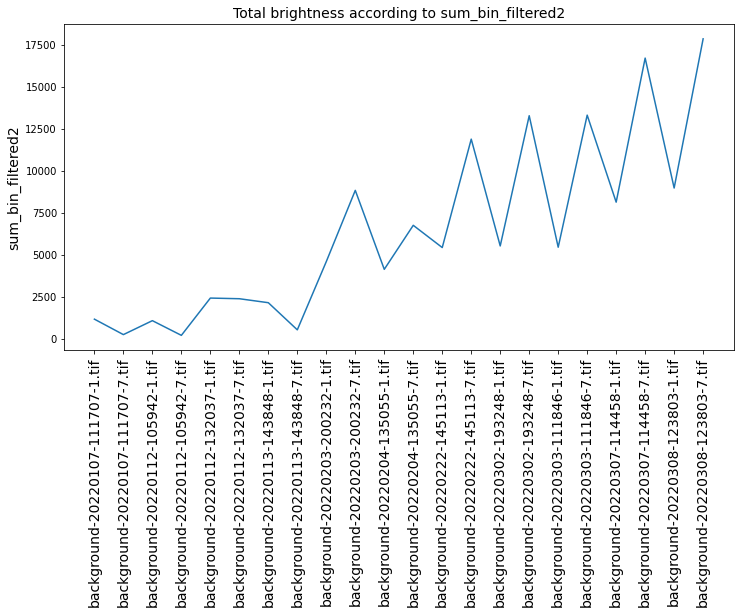

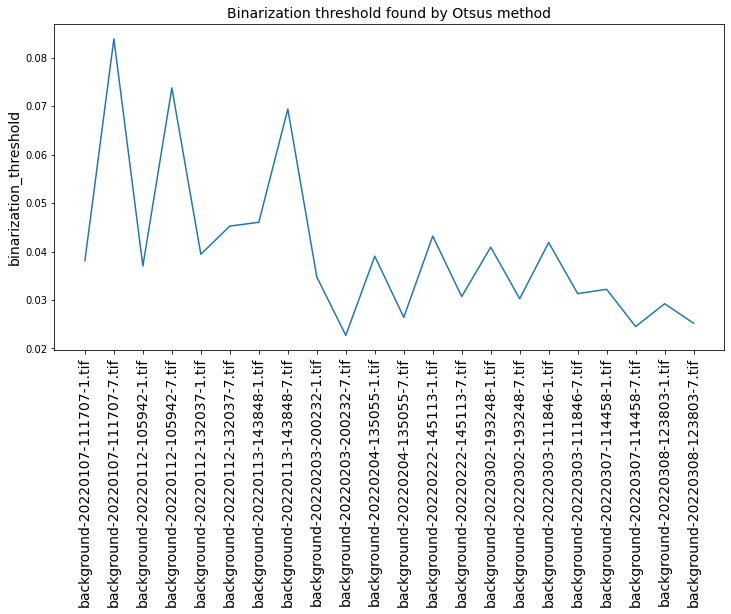

In [10]:
fs = 14

plt.figure(figsize=(12,6))
plt.plot(df['image_name'], df['sum_bin_filtered2'])
plt.xticks(rotation=90, fontsize=fs)
plt.ylabel('sum_bin_filtered2', fontsize=fs)
plt.title('Total brightness according to sum_bin_filtered2', fontsize=fs)
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df['image_name'], df['binarization_threshold'])
plt.xticks(rotation=90, fontsize=fs)
plt.ylabel('binarization_threshold', fontsize=fs)
plt.title('Binarization threshold found by Otsus method', fontsize=fs)
plt.show()